<a href="https://colab.research.google.com/github/microprediction/winning/blob/main/Democracy_Correlation_Trade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thurston voting proclivity adjustment

A simple voting proclivity adjustment to state voting probabilities (e.g PA).


1.   Take Harris win probability $p_1$ from whatever source (e.g. 538, prediction markets etc).
2.   Calibrate 2-horse Thurstonian model where $X_1 \sim N(a,1)$ and $X_2 \sim N(-a,1)$ anc calibrate $a$ and verify  $Prob(X_1<X_2)=p_1$
3.   The variable $X_i$ represents the (negative) appeal of party $i$ for $i=1,2$. In this Thurstonian model the probability of choosing party $i$ is $p_i$ where for $i=1$, $p_1=Prob(X_1<X_2)$ and conversely $i=2$, $p_2=Prob(X_2<X_1)$
4.   But now let's assume that there is another variable $D \sim N(b,1)$ representing the appeal of democracy itself. A person will only vote if $D<0$.
5.   Let $\rho$ be the correlation between $D$ and $X_1-X_2$. I would like you to plot the probability of a Harris victory as a function of $\rho$.



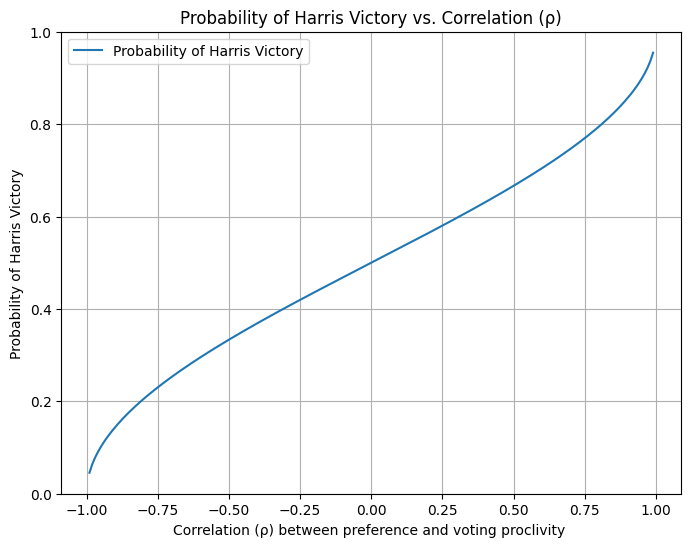

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal

# Given Harris win probability p1
p1 = 0.5  # You can adjust this value as needed

# Calibrate 'a' in the Thurstonian model
z = norm.ppf(p1)
a = - (np.sqrt(2) / 2) * z

# Set 'b' for D ~ N(b, 1)
b = 0  # Assuming b = 0

# Range of rho values (avoid -1 and 1 to prevent singular covariance)
rho_values = np.linspace(-0.99, 0.99, 200)

# Prepare array to store results
P_Harris_victory = []

# Mean vector
mu = [2 * a, b]

# Variances
sigma_Y2 = 2  # Variance of Y = X1 - X2
sigma_D2 = 1  # Variance of D

# P(D < 0)
P_D_less_0 = norm.cdf(-b)  # Since b = 0, P_D_less_0 = 0.5

for rho in rho_values:
    # Covariance between Y and D
    cov_YD = rho * np.sqrt(sigma_Y2 * sigma_D2)

    # Covariance matrix
    cov_matrix = [[sigma_Y2, cov_YD],
                  [cov_YD, sigma_D2]]

    # Define the limits for integration
    lower_limits = [-np.inf, -np.inf]
    upper_limits = [0, 0]

    # Create a multivariate normal distribution
    rv = multivariate_normal(mean=mu, cov=cov_matrix)

    # Compute P(Y < 0, D < 0)
    P_joint = rv.cdf(upper_limits)

    # Compute P(Harris victory) = P(Y < 0 | D < 0)
    P_Harris = (P_joint) / P_D_less_0
    P_Harris_victory.append(P_Harris)

# Convert results to numpy array
P_Harris_victory = np.array(P_Harris_victory)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(rho_values, P_Harris_victory, label='Probability of Harris Victory')
plt.title('Probability of Harris Victory vs. Correlation (ρ)')
plt.xlabel('Correlation (ρ) between preference and voting proclivity ')
plt.ylabel('Probability of Harris Victory')
plt.legend()
plt.grid(True)
plt.show()


Love Thurstonian models? You're in luck they are now $100$ times more usable than they used to be. See [paper](https://github.com/microprediction/winning/blob/main/docs/Horse_Race_Problem__SIAM_updated.pdf).